In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('../data')

import congress_db
from setup_db import Candidate, Contribution, Committee
session = congress_db.create_session()

In [18]:
from sqlalchemy import func

contributions = session.query(Candidate.name, func.sum(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names, amounts = zip(*contributions)

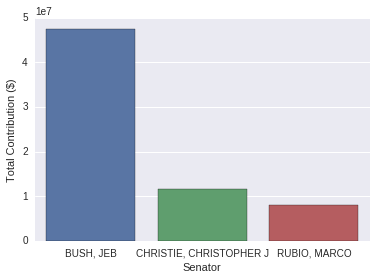

In [19]:
sns.barplot(names[:3], amounts[:3])
plt.xlabel('Senator')
plt.ylabel('Total Contribution ($)')
plt.show()